In [4]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
df = pd.read_table('house_selling_prices.txt')
df.head()

,House,Taxes,Bedrooms,Baths,Quadrant,NW,Price,Size,Lot
0,1,1360,3,2.0,NW,1,145000,1240,18000
1,2,1050,1,1.0,NW,1,68000,370,25000
2,3,1010,3,1.5,NW,1,115000,1130,25000
3,4,830,3,2.0,SW,0,69000,1120,17000
4,5,2150,3,2.0,NW,1,163000,1710,14000


In [5]:
# Continous/Count Summary Stats
df['Price'].describe()
# fairly normal b/c mean and median are close

count       100.000000
mean     126698.000000
std       56356.774718
min       21000.000000
25%       86875.000000
50%      123750.000000
75%      153075.000000
max      338000.000000
Name: Price, dtype: float64

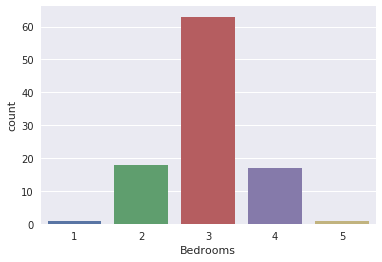

In [6]:
# Nominal/Ordinal Data Summary Stats
bedroom_count = df['Bedrooms'].value_counts()
sns.countplot(df['Bedrooms']) # counts and plots

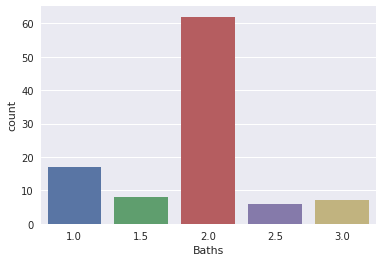

In [7]:
sns.countplot(df['Baths'])

In [8]:
# OLS Regression Results
import statsmodels.api as sm

X = df['Price']
Y = df['Taxes']

model = sm.OLS(Y,X).fit()
print(model.summary())

/usr/local/lib64/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                  Taxes   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1036.
Date:                Wed, 11 Apr 2018   Prob (F-statistic):           3.07e-54
Time:                        15:25:50   Log-Likelihood:                -777.35
No. Observations:                 100   AIC:                             1557.
Df Residuals:                      99   BIC:                             1559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price          0.0134      0.000     32.184      0.0

In [9]:
Y = df['Price']
X = df[['Bedrooms', 'Taxes', 'Baths', 'Size', 'Lot']]

model = sm.OLS(Y,X).fit()
print(model.summary())
# 96% of the variance can be described by this model
# The currated model and ours are statistically indistinguishable e-65

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     475.7
Date:                Wed, 11 Apr 2018   Prob (F-statistic):           1.39e-65
Time:                        15:25:50   Log-Likelihood:                -1162.8
No. Observations:                 100   AIC:                             2336.
Df Residuals:                      95   BIC:                             2349.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bedrooms   -5084.7061   4141.321     -1.228      0.2